# MNIST Classification test using a 4-dimensional random vectors
Due to the double randomness, this test should fluctuate accuracy more than other tests

In [1]:
import math
import numpy
import sys
sys.path.append('..')
from helpers.basis_helper import normalize, hadamard
from helpers.tf_qsoftmax import qsoftmax
from random_helpers import random_vectors, worst_angle

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#### Construct a random set of orthonormal vectors in 6 dimensions


In [3]:
rand_4 = random_vectors(10,4)

Display the minimum angle between vectors

In [4]:
worst_angle(rand_4)

26.446675069685174

#### Let's build and train our model
This is the same architecture except we have an output of 4 dimensions and apply the qsoftmax function as the activation function

In [5]:
rand4_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Lambda(qsoftmax(rand_4))
])

In [6]:
rand4_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [7]:
rand4_model.fit(x_train,
              y_train,
              epochs=20,
              validation_data=(x_test, y_test),
              verbose=0)

## We display some results
### The validation loss tells us how well the training went

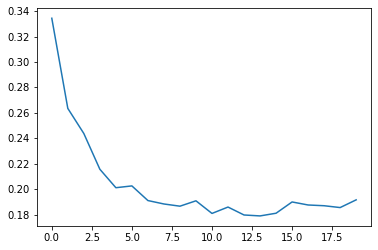

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(rand4_model.history.history['val_loss'])

### Print the final results in big bold text

In [9]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    rand4_model.history.history['val_accuracy'][-1]*100,
    rand4_model.history.history['accuracy'][-1]*100)
display(Markdown(f"# {text}"))

# The accuracy is 95.790% for the test set and 96.273% for the training set

In [10]:
text

'The accuracy is 95.790% for the test set and 96.273% for the training set'